This notebook picks up where the other left off, because it's on a local workstation with PyPlot.

In [1]:
using PyPlot
plt[:style][:use]("ggplot")

In [2]:
exp_params = Dict()
dir = joinpath(homedir(), "seungmount/research/Alembic/datasets/davit_piritest")
exp_dirs = ["standard_224", "standard_160", "across_224", "across_160"]
ms_names = ["original", "net_adj", "net_across", "bandpass"]
for exp in exp_dirs
    exp_params[exp] = Dict()
    for ms in ms_names
        fn = join([exp, ms], "_")
        exp_params[exp][ms] = readdlm(joinpath(homedir(), dir, string(fn, "_params.csv")))
    end
end

        filtered[collect(get_rejected_indices(match))] = 0
        dist = get_properties(match, "norm")
        r_max = get_properties(match, "r_max")
        sigma50 = get_properties(match, 0.50)
        sigma75 = get_properties(match, 0.75)
        sigma95 = get_properties(match, 0.95)
        r_delta5 = get_properties(match, 5)
        r_delta10 = get_properties(match, 10)
        r_delta15 = get_properties(match, 15)
        params = hcat(filtered, dist, r_max, sigma50, sigma75, sigma95, r_delta5, r_delta10, r_delta15)

In [33]:
function plot_meshset_hist(ms_params, total_ms, k)
    axes = []
    for i in 1:8
        subplot(8, total_ms, 8*(k-1)+i)
        binmax = maximum(ms_params[:,i+1])
        bins = collect(linspace(0,binmax,50))
        plt[:hist](ms_params[ms_params[:,1] .== 1, i+1], bins=bins, color="g", alpha=0.3)
        plt[:hist](ms_params[ms_params[:,1] .== 0, i+1], bins=bins, color="r", alpha=0.3)
        ax = gca()
        ax[:set_ylim]((0.5,10e5))
        ax[:set_yscale]("log")
        push!(axes, ax)
    end
    return axes
end

plot_meshset_hist (generic function with 1 method)

In [ ]:
standard_224 = exp_params["standard_224"]

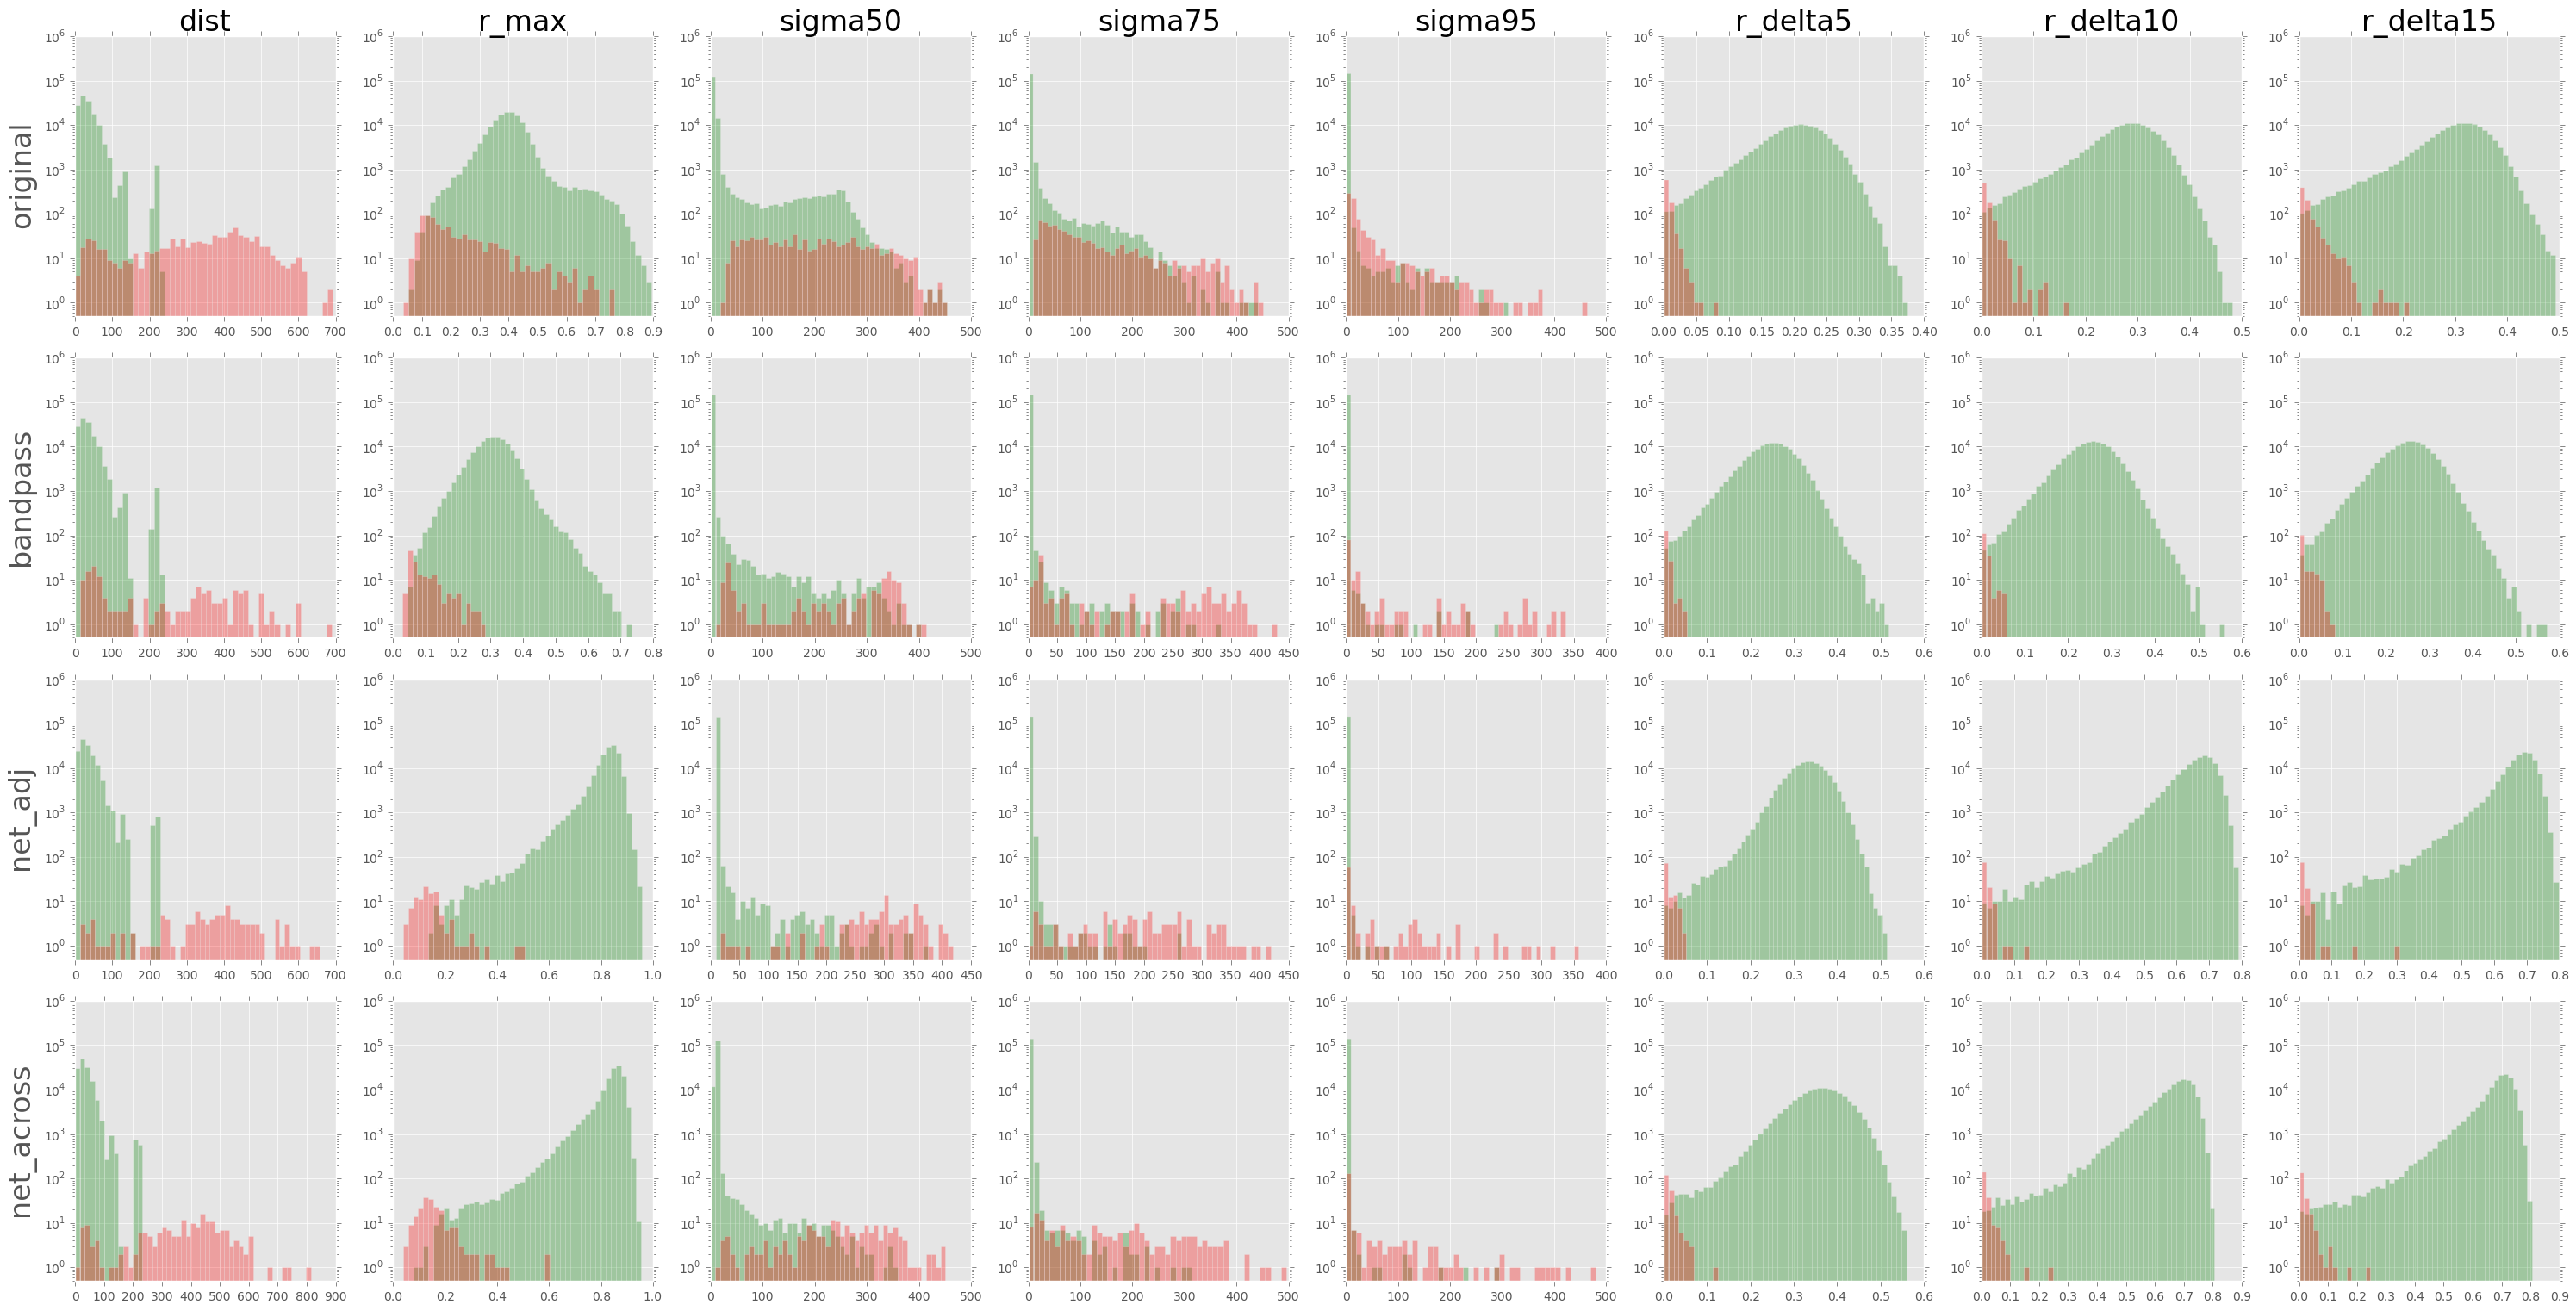

In [34]:
rows = ["original", "bandpass", "net_adj", "net_across"]
cols = ["dist", "r_max", "sigma50", "sigma75", "sigma95", "r_delta5", "r_delta10", "r_delta15"]
fig = figure(figsize=(30,30))
# fig, axes = plt[:subplots](nrows=4, ncols=4, figsize=(30,20))
axes = Array{PyCall.PyObject,2}(length(rows),length(cols))
for (k, ms_name) in enumerate(rows)
    ms_params = standard_224[ms_name]
    axes[k,:] = plot_meshset_hist(ms_params, 8, k)
end

for (ax, col) in zip(axes[1,:], cols)
    ax[:set_title](col, fontsize=24)
end
for (ax, row) in zip(axes[:,1], rows)
    ax[:set_ylabel](row, fontsize=24)
end
fig[:tight_layout]()
plt[:show]()

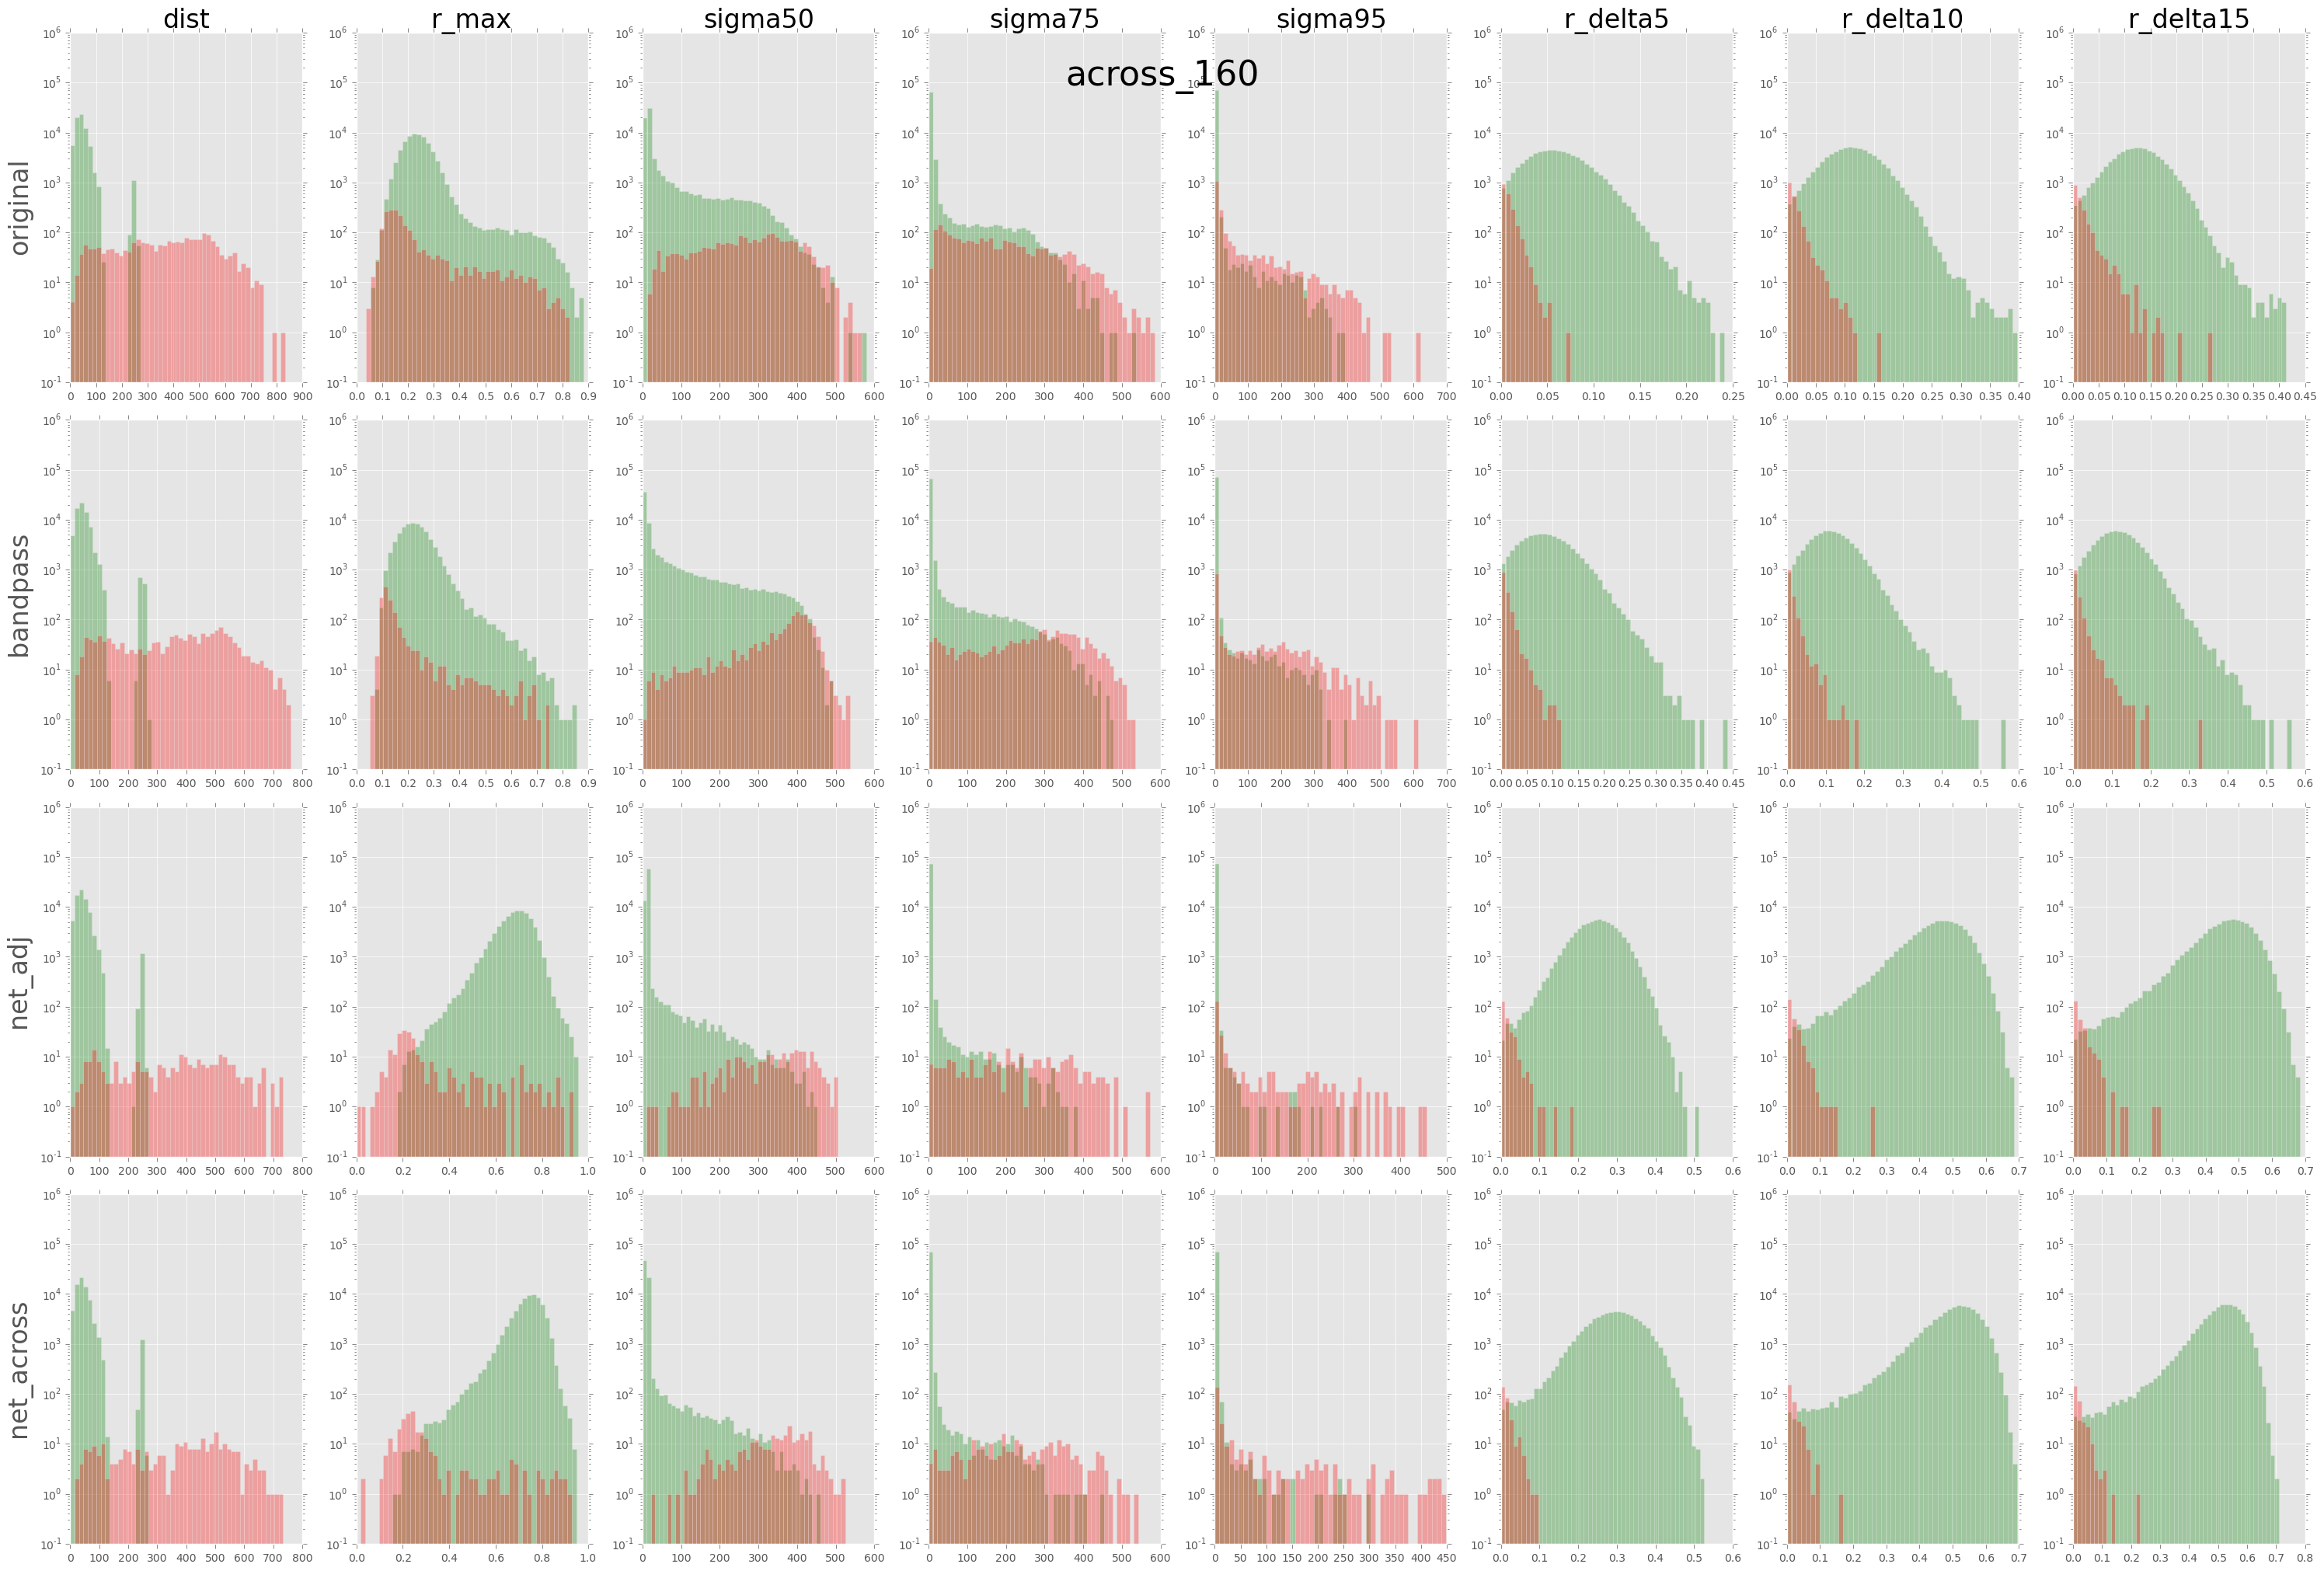

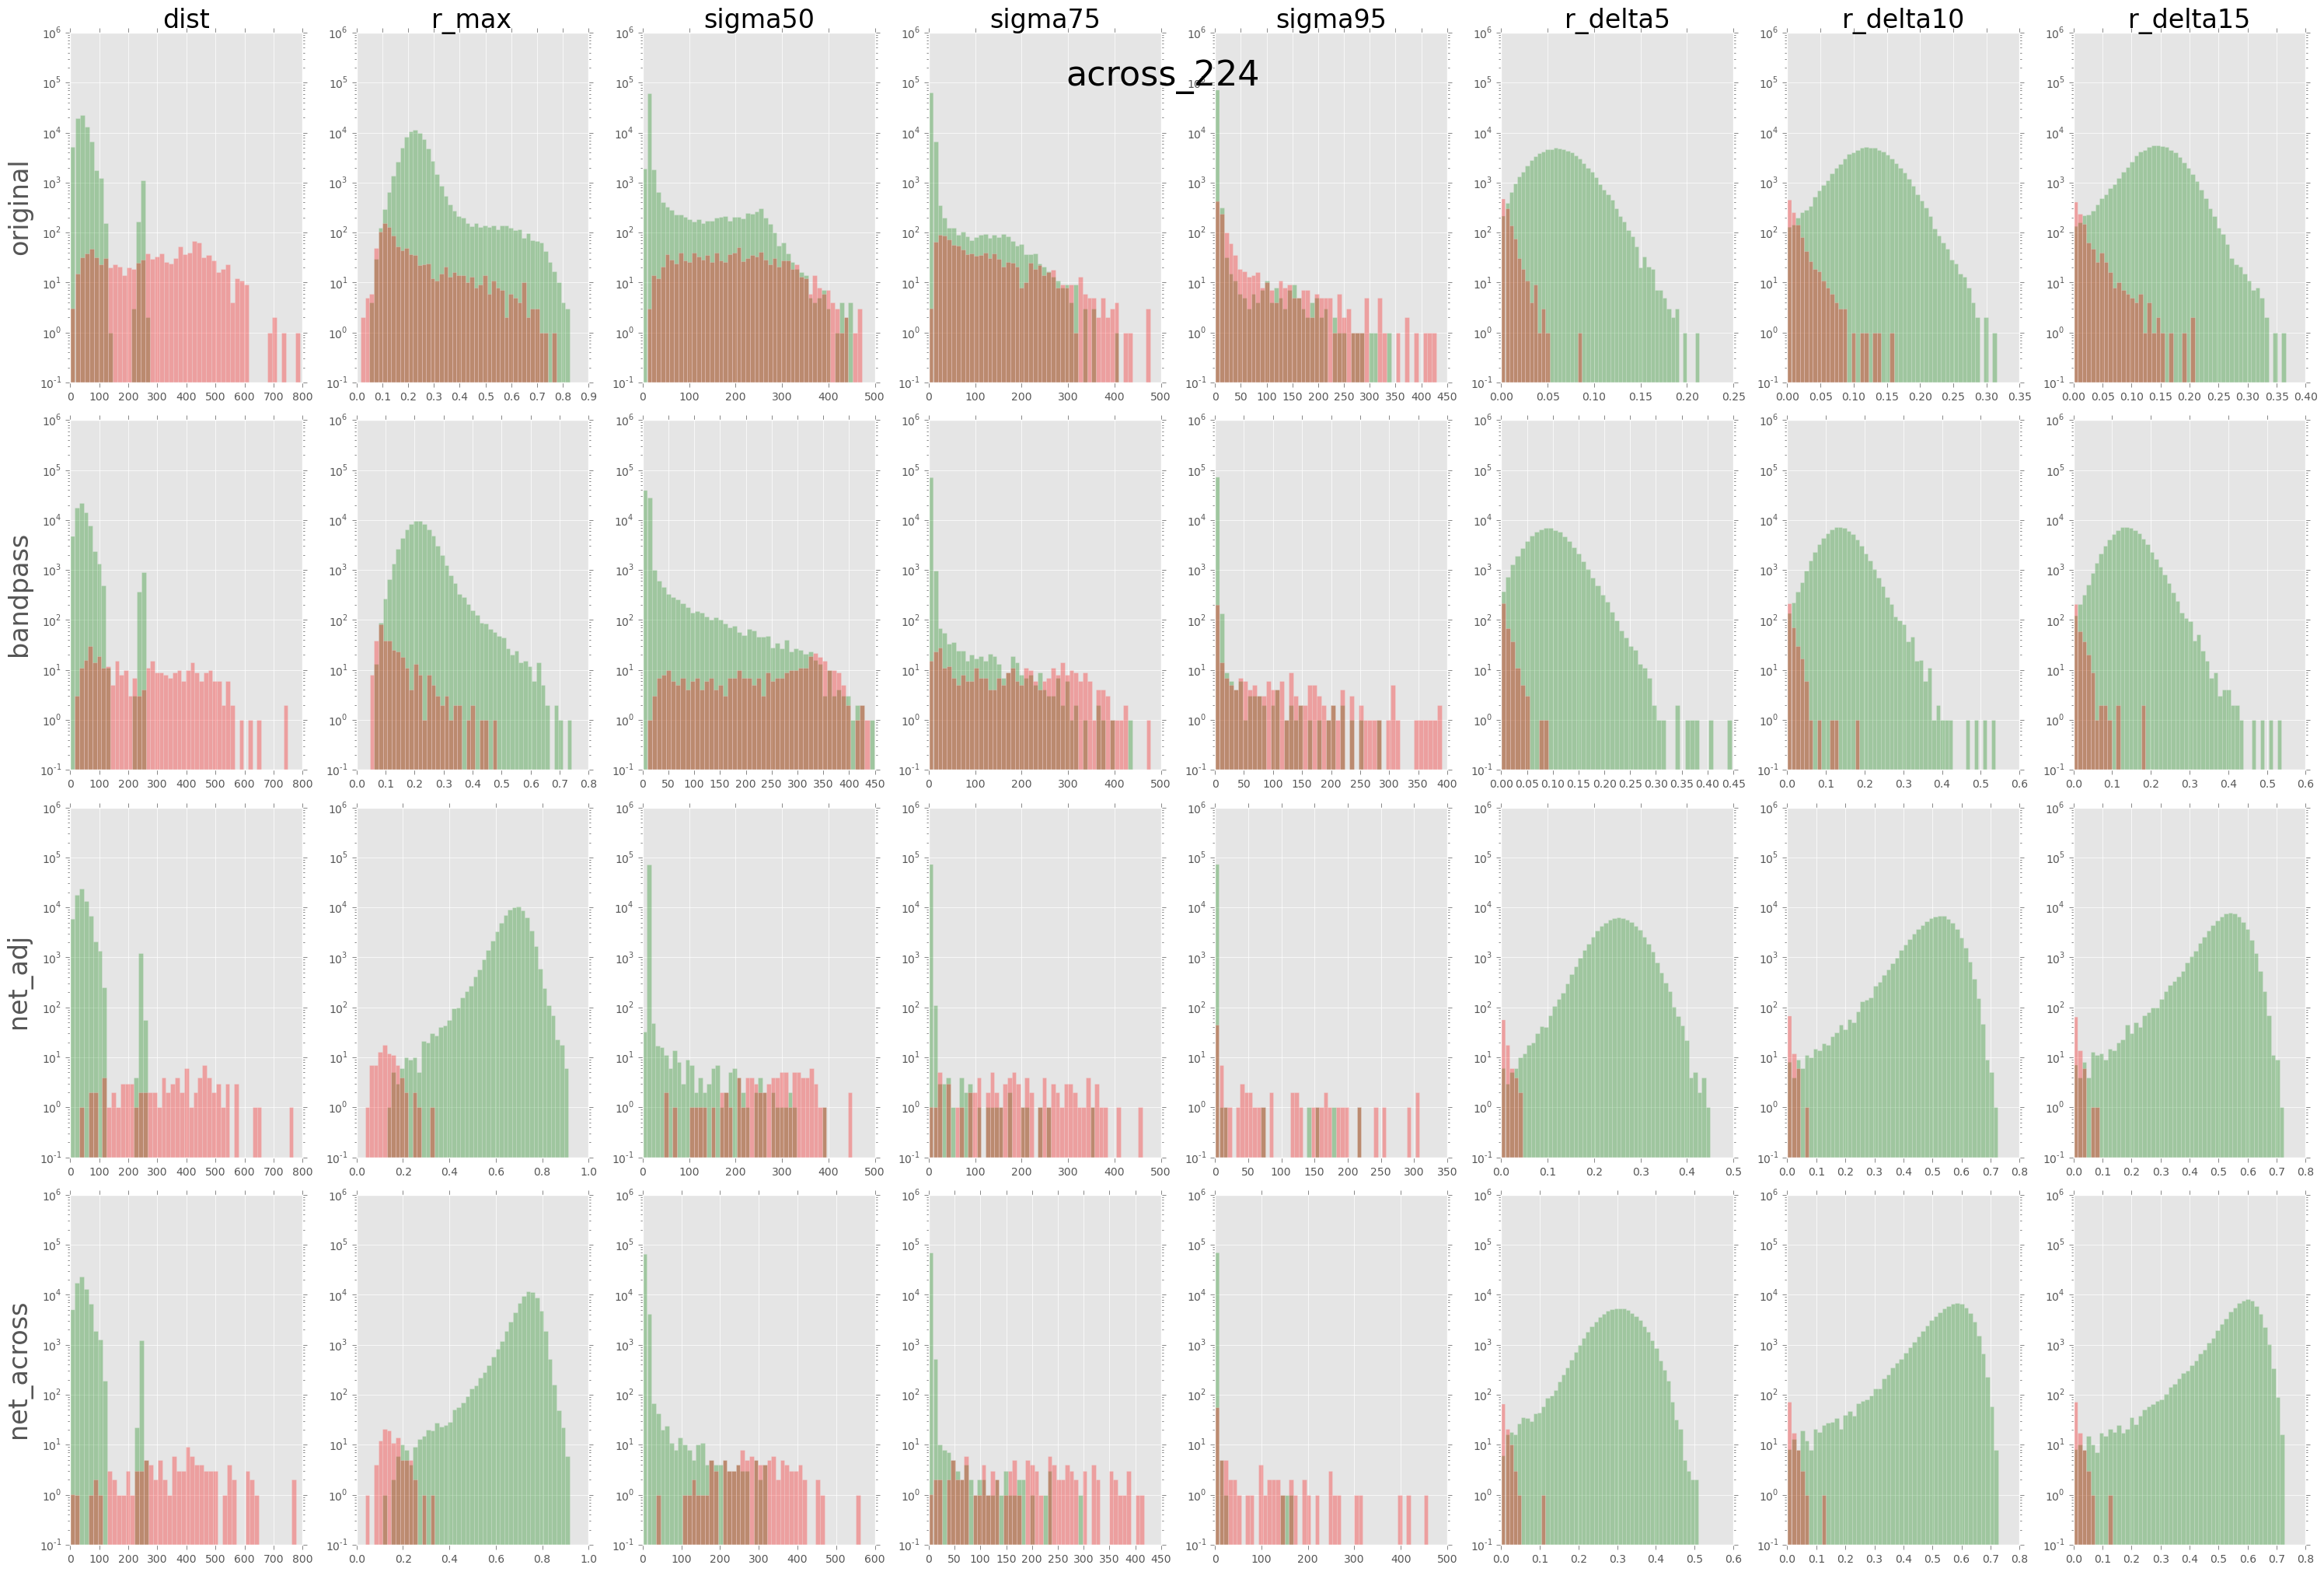

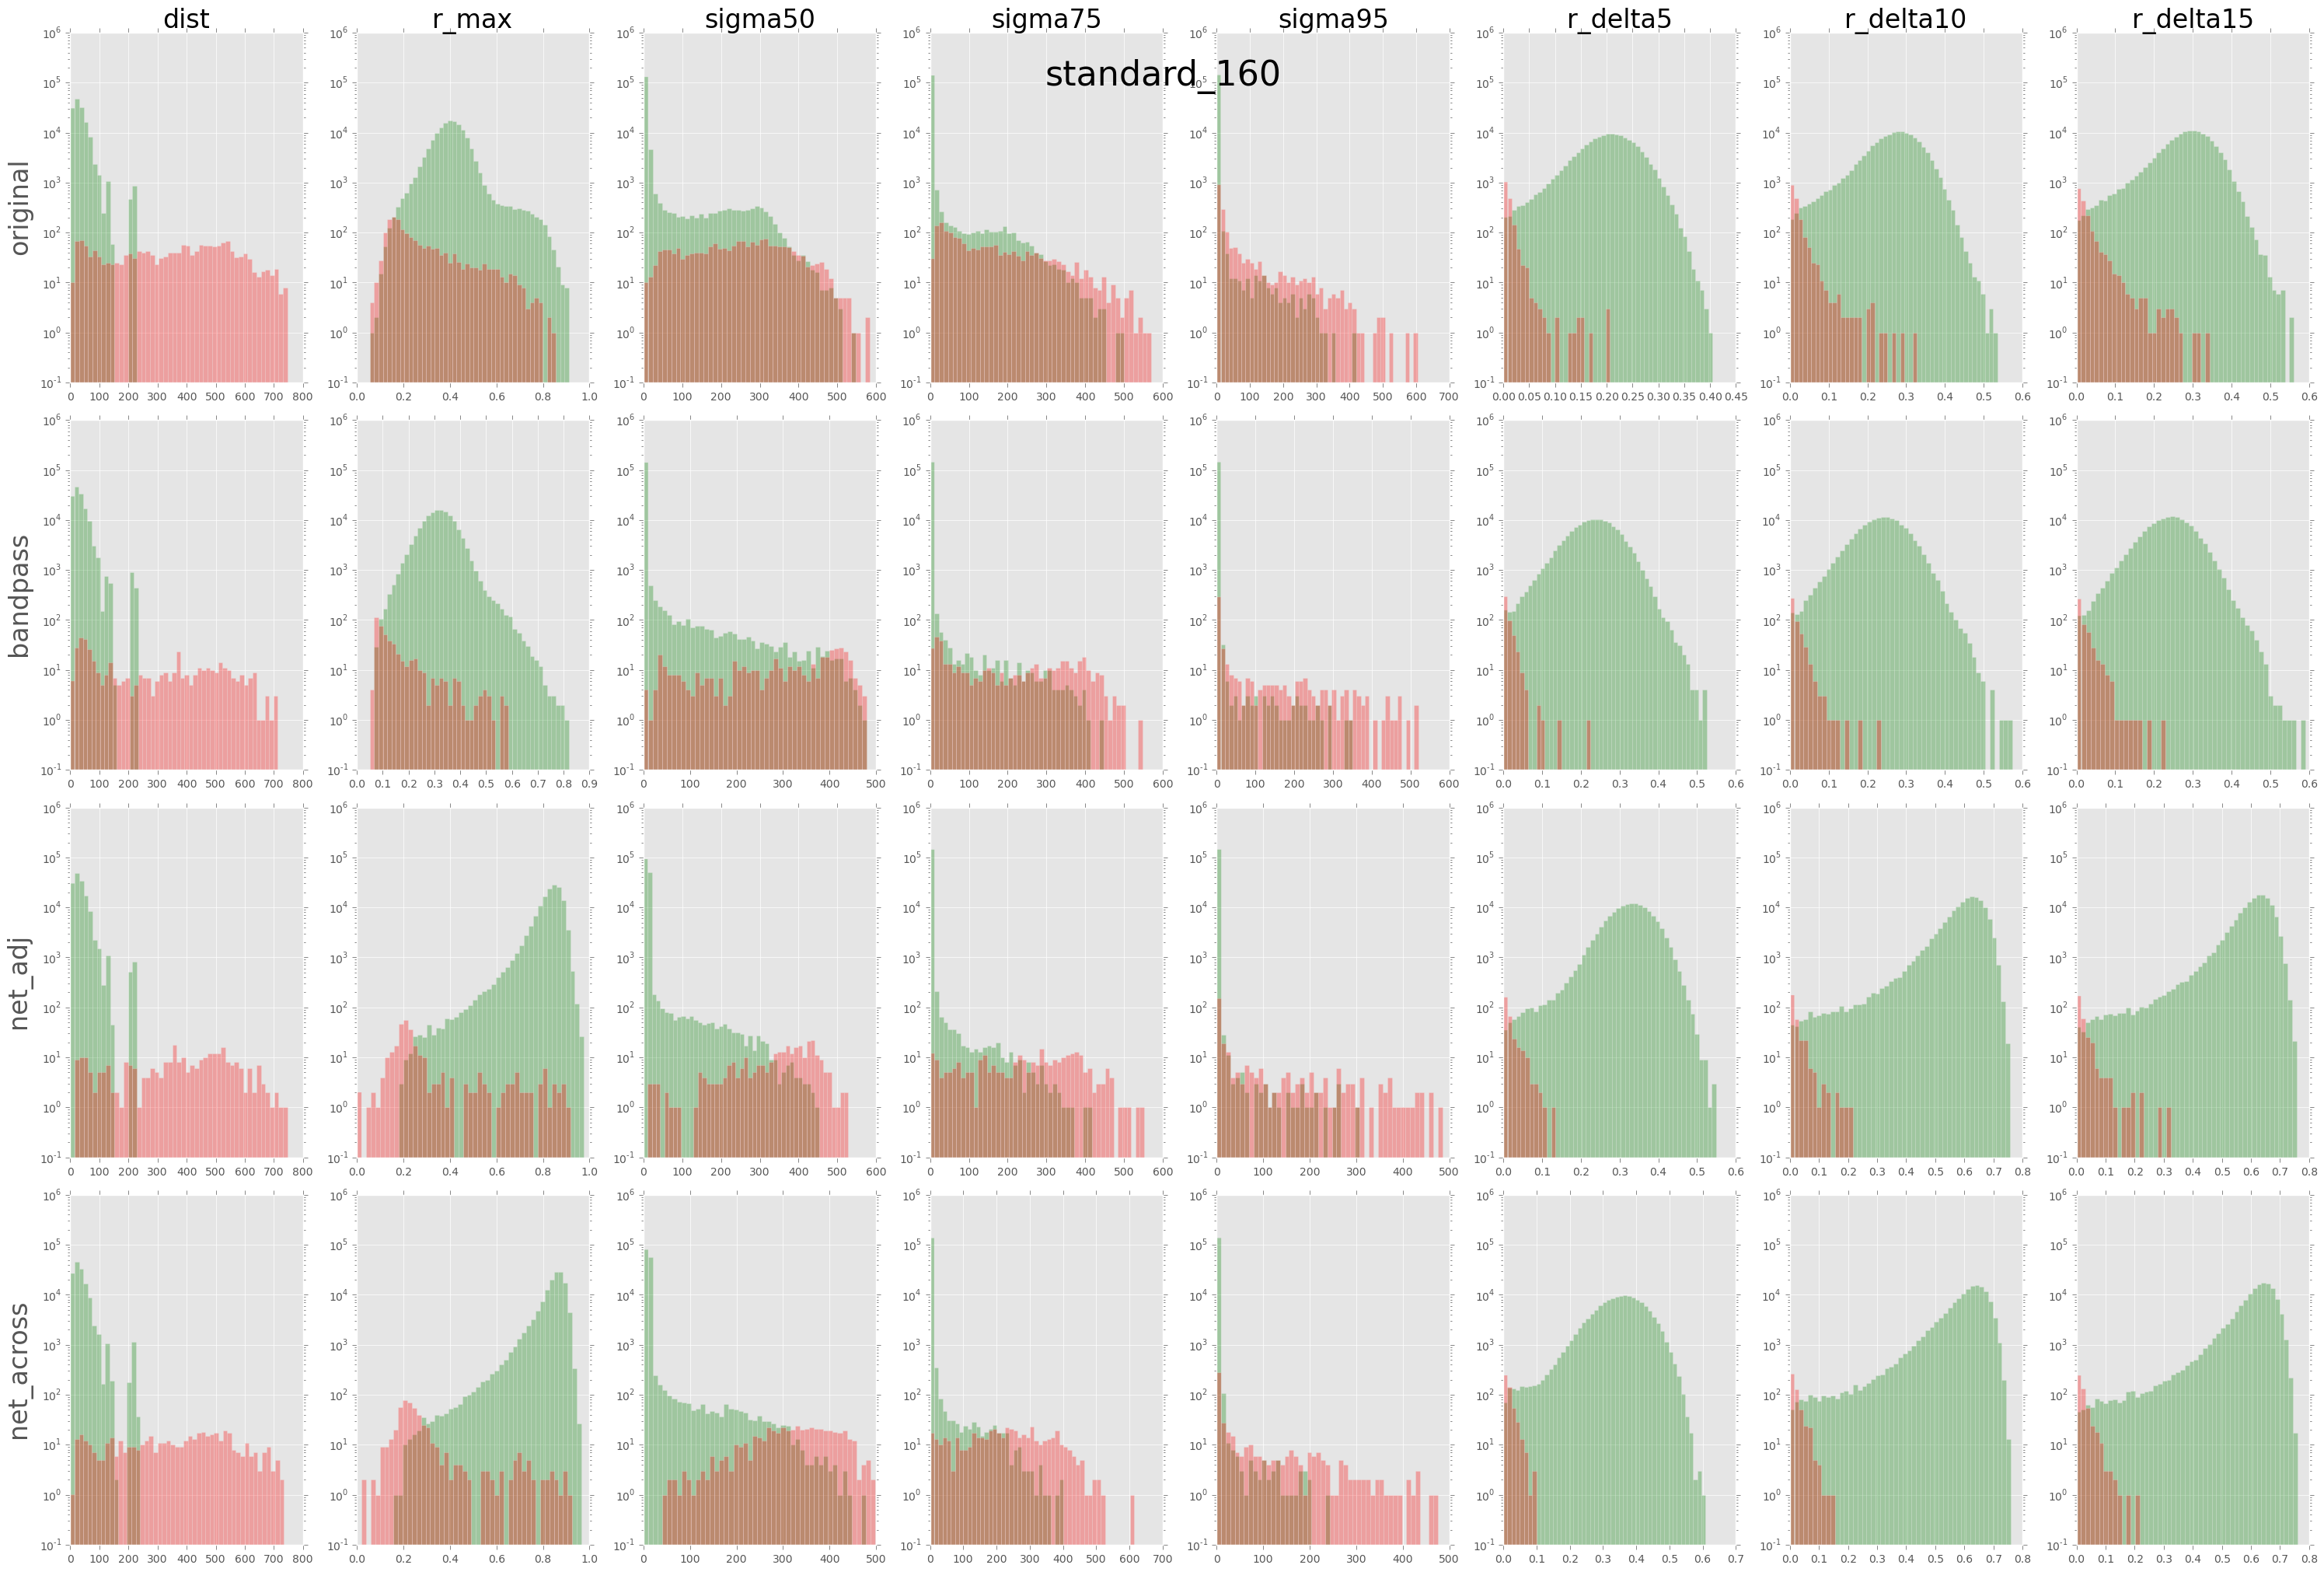

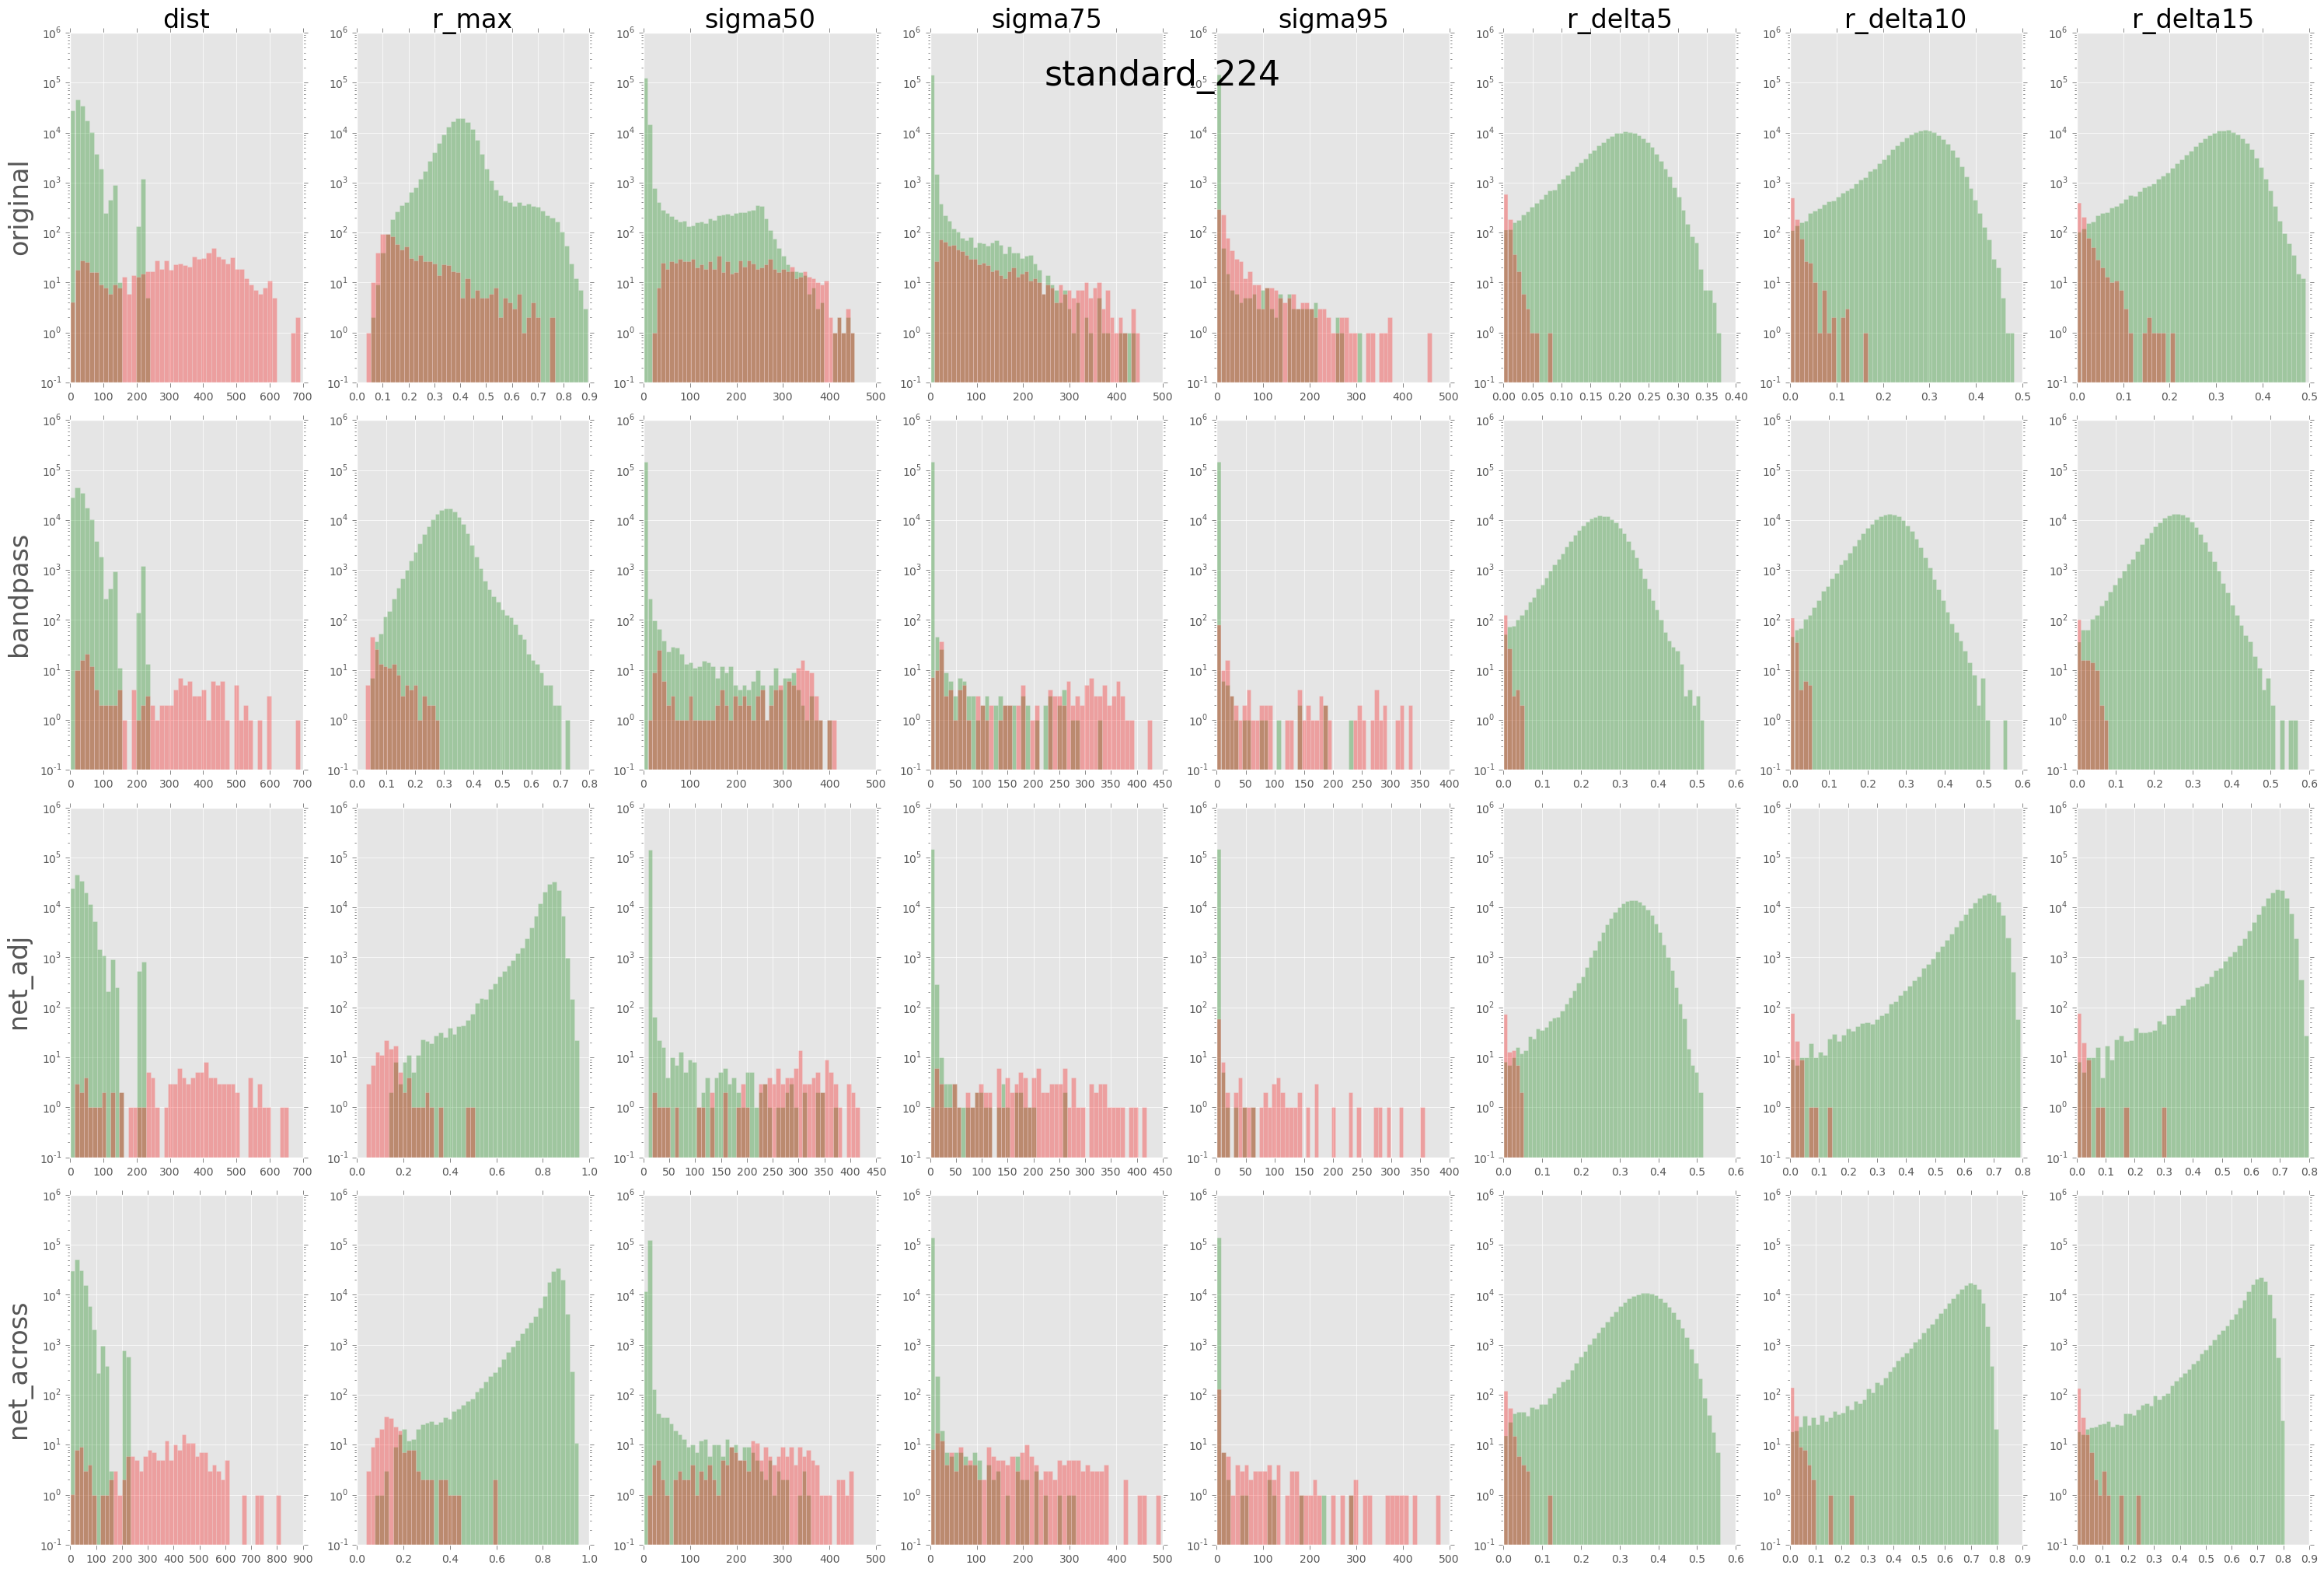

In [22]:
rows = ["original", "bandpass", "net_adj", "net_across"]
cols = ["dist", "r_max", "sigma50", "sigma75", "sigma95", "r_delta5", "r_delta10", "r_delta15"]
for (exp_name, param_dict) in exp_params
    fig = figure(figsize=(30,40))
    axes = Array{PyCall.PyObject,2}(length(rows),length(cols))
    for (k, ms_name) in enumerate(rows)
        ms_params = param_dict[ms_name]
        axes[k,:] = plot_meshset_hist(ms_params, 8, k)
    end

    for (ax, col) in zip(axes[1,:], cols)
        ax[:set_title](col, fontsize=24)
    end
    for (ax, row) in zip(axes[:,1], rows)
        ax[:set_ylabel](row, fontsize=24)
    end
    suptitle(exp_name, fontsize=32)
    fig[:tight_layout]()
    plt[:show]()
end

In [62]:
function plot_meshset_hist_modified(ms_params, total_ms, k)
    axes = []
    for (i,j) in enumerate([1,2,6])
        subplot(3, total_ms, 3*(k-1)+i)
        ax = gca()
        ax[:set_ylim]((0.5,10e5))
        ax[:set_yscale]("log")
        binmax = maximum(ms_params[:,j+1])
        if j == 2
            ax[:set_xlim]((0,1))
            binmax = 1
        elseif j == 6
            ax[:set_xlim]((0,0.6))
            binmax = 0.6
        end
        bins = collect(linspace(0,binmax,50))
        plt[:hist](ms_params[ms_params[:,1] .== 1, j+1], bins=bins, color="g", alpha=0.3)
        plt[:hist](ms_params[ms_params[:,1] .== 0, j+1], bins=bins, color="r", alpha=0.3)
        push!(axes, ax)
    end
    return axes
end

plot_meshset_hist_modified (generic function with 1 method)

In [129]:
pygui(true)
rows = ["raw", "bandpass", "convnet"]
cols = ["norm", "r max", "r delta"]
fig = figure()
# fig, axes = plt[:subplots](nrows=4, ncols=4, figsize=(30,20))
axes = Array{PyCall.PyObject,2}(length(rows),length(cols))
for (k, ms_name) in enumerate(rows)
    if ms_name == "convnet"
        ms_name = "net_adj"
    end
    if ms_name == "raw"
        ms_name = "original"
    end
    ms_params = standard_224[ms_name]
    axes[k,:] = plot_meshset_hist_modified(ms_params, 3, k)
end

for (ax, col) in zip(axes[1,:], cols)
    ax[:set_title](col) #, fontsize=24)
end
for (ax, row) in zip(axes[:,1], rows)
    ax[:set_ylabel](row) #, fontsize=24)
end
fig[:tight_layout]()
plt[:show]()

In [131]:
rows = ["raw", "bandpass", "convnet"]
cols = ["norm", "r max", "r delta"]
fig = figure()
# fig, axes = plt[:subplots](nrows=4, ncols=4, figsize=(30,20))
axes = Array{PyCall.PyObject,2}(length(rows),length(cols))
for (k, ms_name) in enumerate(rows)
    if ms_name == "convnet"
        ms_name = "net_adj"
    end
    if ms_name == "raw"
        ms_name = "original"
    end
    ms_params = exp_params["standard_160"][ms_name]
    axes[k,:] = plot_meshset_hist_modified(ms_params, 3, k)
end

for (ax, col) in zip(axes[1,:], cols)
    ax[:set_title](col) #, fontsize=24)
end
for (ax, row) in zip(axes[:,1], rows)
    ax[:set_ylabel](row) #, fontsize=24)
end
fig[:tight_layout]()
plt[:show]()

In [133]:
rows = ["raw", "bandpass", "convnet"]
cols = ["norm", "r max", "r delta"]
fig = figure()
# fig, axes = plt[:subplots](nrows=4, ncols=4, figsize=(30,20))
axes = Array{PyCall.PyObject,2}(length(rows),length(cols))
for (k, ms_name) in enumerate(rows)
    if ms_name == "convnet"
        ms_name = "net_adj"
    end
    if ms_name == "raw"
        ms_name = "original"
    end
    ms_params = exp_params["across_224"][ms_name]
    axes[k,:] = plot_meshset_hist_modified(ms_params, 3, k)
end

for (ax, col) in zip(axes[1,:], cols)
    ax[:set_title](col) #, fontsize=24)
end
for (ax, row) in zip(axes[:,1], rows)
    ax[:set_ylabel](row) #, fontsize=24)
end
fig[:tight_layout]()
plt[:show]()

In [132]:
rows = ["raw", "bandpass", "convnet"]
cols = ["norm", "r max", "r delta"]
fig = figure()
# fig, axes = plt[:subplots](nrows=4, ncols=4, figsize=(30,20))
axes = Array{PyCall.PyObject,2}(length(rows),length(cols))
for (k, ms_name) in enumerate(rows)
    if ms_name == "convnet"
        ms_name = "net_adj"
    end
    if ms_name == "raw"
        ms_name = "original"
    end
    ms_params = exp_params["across_160"][ms_name]
    axes[k,:] = plot_meshset_hist_modified(ms_params, 3, k)
end

for (ax, col) in zip(axes[1,:], cols)
    ax[:set_title](col) #, fontsize=24)
end
for (ax, row) in zip(axes[:,1], rows)
    ax[:set_ylabel](row) #, fontsize=24)
end
fig[:tight_layout]()
plt[:show]()

In [8]:
"""
Compile precision & recall on param data

f: binary array of labels
d: data array
x: range of thresholds to plot p&r against
"""
function compile_precision_recall(f, d, x)
    n = length(f)
    tp = zeros(Int64, length(x))
    fn = zeros(Int64, length(x))
    fp = zeros(Int64, length(x))
    for (k,z) in enumerate(x)
        tp[k] = sum(f[d .> z] .== 1)
        fp[k] = sum(f[d .> z] .== 0)
        fn[k] = sum(f[d .<= z] .== 1)
    end
    precision = tp ./ (tp + fp)
    recall = tp ./ (tp + fn)
    f1 = 2*tp ./ (2*tp + fp + fn)
    return precision, recall, f1
end        

compile_precision_recall

In [9]:
"""
Compile tp, fp, fn, tn

f: binary array of labels
d: data array
x: range of thresholds to plot p&r against
"""
function compile_rejection_accuracy(f, d, x)
    n = length(f)
    tp = zeros(Int64, length(x))
    fn = zeros(Int64, length(x))
    fp = zeros(Int64, length(x))
    tn = zeros(Int64, length(x))
    for (k,z) in enumerate(x)
        tp[k] = sum(f[d .> z] .== 1)
        fp[k] = sum(f[d .> z] .== 0)
        fn[k] = sum(f[d .<= z] .== 1)
        tn[k] = sum(f[d .<= z] .== 0)
    end
    return tp, fp, fn, tn
end  

compile_rejection_accuracy

In [10]:
x = collect(linspace(0,1,300))
nar_f = standard_224["net_adj"][:,1]
nar_d = standard_224["net_adj"][:,8]
bpr_f = standard_224["bandpass"][:,1]
bpr_d = standard_224["bandpass"][:,8]
na_pr, na_re, na_f1 = compile_precision_recall(nar_f, nar_d, x)
bp_pr, bp_re, bp_f1 = compile_precision_recall(bpr_f, bpr_d, x);

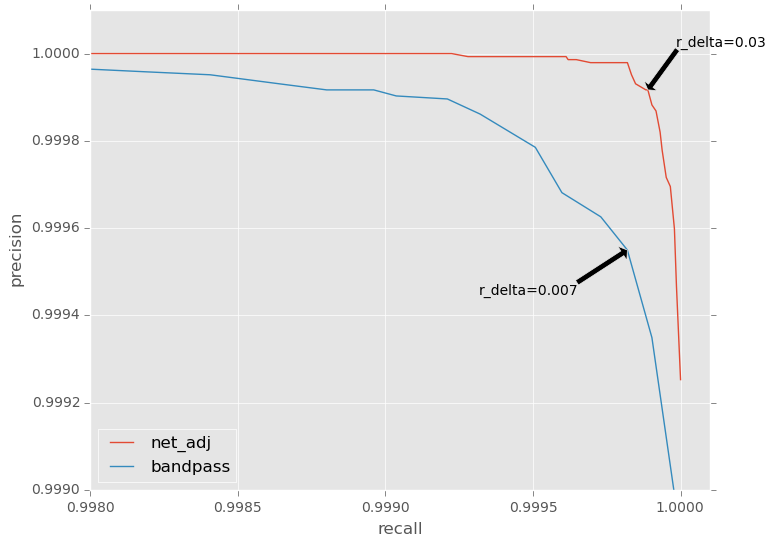

In [11]:
k = 80
plot(na_re[1:k], na_pr[1:k], label="net_adj")
plot(bp_re[1:k], bp_pr[1:k], label="bandpass")
ax = gca()
ax[:set_ylim]((0.9990,1.0001))
ax[:set_xlim]((0.998,1.0001))
xlabel("recall")
ylabel("precision")
legend(loc="best");
annotate("r_delta=$(round(x[na_f1 .== maximum(na_f1)][1],3))",
    xy=[na_re[na_f1 .== maximum(na_f1)];na_pr[na_f1 .== maximum(na_f1)]],
    xytext=[na_re[na_f1 .== maximum(na_f1)]+0.0001;na_pr[na_f1 .== maximum(na_f1)]+0.0001],
    xycoords="data",
    arrowprops=Dict("facecolor"=>"black"))
annotate("r_delta=$(round(x[bp_f1 .== maximum(bp_f1)][1],3))",
    xy=[bp_re[bp_f1 .== maximum(bp_f1)];bp_pr[bp_f1 .== maximum(bp_f1)]],
    xytext=[bp_re[bp_f1 .== maximum(bp_f1)]-0.0005;bp_pr[bp_f1 .== maximum(bp_f1)]-0.0001],
    xycoords="data",
    arrowprops=Dict("facecolor"=>"black"));

In [12]:
x[na_f1 .== maximum(na_f1)]

1-element Array{Float64,1}:
 0.0301003

In [13]:
x[bp_f1 .== maximum(bp_f1)]

1-element Array{Float64,1}:
 0.00668896

In [27]:
a = standard_224["net_adj"][standard_224["net_adj"][:,8] .> 0.06,:]
a[a[:,1] .== 0, :]

3×9 Array{Float64,2}:
 0.0  30.4337  0.320277  25.7745  13.2566  …  0.0402744  0.0826143  0.0826143
 0.0  25.9408  0.30813   45.9036  14.4447     0.0451496  0.0715022  0.0811264
 0.0  43.8548  0.48442   17.4777  13.3183     0.0246825  0.141803   0.307904 

In [121]:
x = collect(linspace(0,1,300))
nar_f = standard_224["net_adj"][:,1]
nar_d = standard_224["net_adj"][:,7]
bpr_f = standard_224["bandpass"][:,1]
bpr_d = standard_224["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);

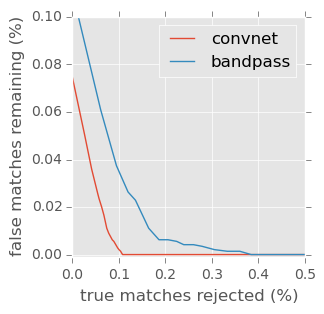

In [122]:
fig = figure(figsize=(3,3))
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
xlabel("true matches rejected (%)")
ylabel("false matches remaining (%)")
ax[:set_xlim]((0,0.5))
ax[:set_ylim]((-0.001,0.1))
legend(loc="best");

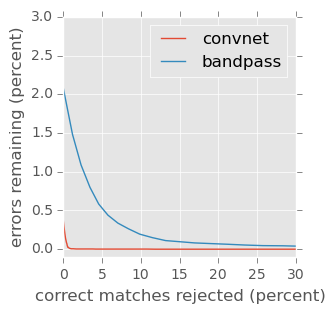

In [115]:
x = collect(linspace(0,1,300))
nar_f = exp_params["across_160"]["net_adj"][:,1]
nar_d = exp_params["across_160"]["net_adj"][:,7]
bpr_f = exp_params["across_160"]["bandpass"][:,1]
bpr_d = exp_params["across_160"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
fig = figure(figsize=(3,3))
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
xlabel("correct matches rejected (percent)")
ylabel("errors remaining (percent)")
ax[:set_xlim]((0,30))
ax[:set_ylim]((-0.1,3.0))
legend(loc="best");

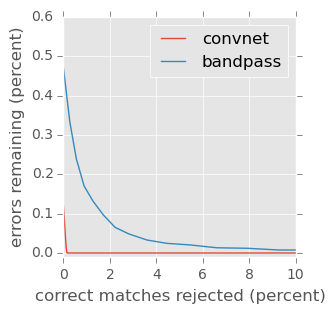

In [112]:
x = collect(linspace(0,1,300))
nar_f = exp_params["across_224"]["net_adj"][:,1]
nar_d = exp_params["across_224"]["net_adj"][:,7]
bpr_f = exp_params["across_224"]["bandpass"][:,1]
bpr_d = exp_params["across_224"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
fig = figure(figsize=(3,3))
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
xlabel("correct matches rejected (percent)")
ylabel("errors remaining (percent)")
ax[:set_xlim]((0,10))
ax[:set_ylim]((-0.01,0.6))
legend(loc="best");

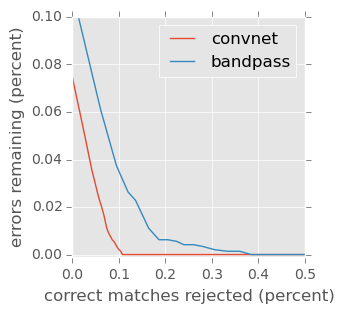

In [106]:
x = collect(linspace(0,1,300))
nar_f = exp_params["standard_224"]["net_adj"][:,1]
nar_d = exp_params["standard_224"]["net_adj"][:,7]
bpr_f = exp_params["standard_224"]["bandpass"][:,1]
bpr_d = exp_params["standard_224"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
fig = figure(figsize=(3,3))
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
xlabel("correct matches rejected (percent)")
ylabel("errors remaining (percent)")
ax[:set_xlim]((0,0.5))
ax[:set_ylim]((-0.001,0.1))
legend(loc="best");

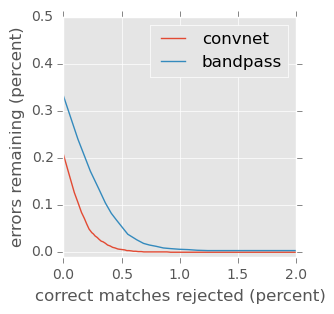

In [114]:
x = collect(linspace(0,1,300))
nar_f = exp_params["standard_160"]["net_adj"][:,1]
nar_d = exp_params["standard_160"]["net_adj"][:,7]
bpr_f = exp_params["standard_160"]["bandpass"][:,1]
bpr_d = exp_params["standard_160"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
fig = figure(figsize=(3,3))
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
xlabel("correct matches rejected (percent)")
ylabel("errors remaining (percent)")
ax[:set_xlim]((0,2))
ax[:set_ylim]((-0.01,0.5))
legend(loc="best");

In [134]:
fig = figure()#figsize=(8,8))
subplot(2,2,1)
x = collect(linspace(0,1,300))
nar_f = exp_params["standard_160"]["net_adj"][:,1]
nar_d = exp_params["standard_160"]["net_adj"][:,7]
bpr_f = exp_params["standard_160"]["bandpass"][:,1]
bpr_d = exp_params["standard_160"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
# xlabel("correct matches rejected (percent)")
ylabel("false matches remaining (%)")
ax[:set_xlim]((0,2))
ax[:set_ylim]((-0.01,0.5))
# legend(loc="best");
title("adjacent 160")

subplot(2,2,2)
x = collect(linspace(0,1,300))
nar_f = exp_params["across_160"]["net_adj"][:,1]
nar_d = exp_params["across_160"]["net_adj"][:,7]
bpr_f = exp_params["across_160"]["bandpass"][:,1]
bpr_d = exp_params["across_160"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
# xlabel("correct matches rejected (percent)")
# ylabel("errors remaining (percent)")
ax[:set_xlim]((0,30))
ax[:set_ylim]((-0.1,3.0))
legend(loc="best");
title("across 160")

subplot(2,2,3)
x = collect(linspace(0,1,300))
nar_f = exp_params["standard_224"]["net_adj"][:,1]
nar_d = exp_params["standard_224"]["net_adj"][:,7]
bpr_f = exp_params["standard_224"]["bandpass"][:,1]
bpr_d = exp_params["standard_224"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
xlabel("true matches rejected (%)")
ylabel("false matches remaining (%)")
ax[:set_xlim]((0,0.5))
ax[:set_ylim]((-0.001,0.1))
# legend(loc="best");
title("adjacent 224")

subplot(2,2,4)
x = collect(linspace(0,1,300))
nar_f = exp_params["across_224"]["net_adj"][:,1]
nar_d = exp_params["across_224"]["net_adj"][:,7]
bpr_f = exp_params["across_224"]["bandpass"][:,1]
bpr_d = exp_params["across_224"]["bandpass"][:,7]
na_tp, na_fp, na_fn, na_tn = compile_rejection_accuracy(nar_f, nar_d, x)
bp_tp, bp_fp, bp_fn, bp_tn = compile_rejection_accuracy(bpr_f, bpr_d, x);
plot((na_fn + na_tn)/sum(nar_f) * 100, (1 - na_tp ./ (na_fp + na_tp))*100, label="convnet")
plot((bp_fn + bp_tn)/sum(bpr_f) * 100, (1 - bp_tp ./ (bp_fp + bp_tp))*100, label="bandpass")
ax = gca()
xlabel("true matches rejected (%)")
# ylabel("errors remaining (percent)")
ax[:set_xlim]((0,10))
ax[:set_ylim]((-0.01,0.6))
# legend(loc="best");
title("across 224");